#  3. ニューラルネットワーク

In [1]:
from IPython.display import Image, display
import numpy as np

## 3.1 パーセプトロンからニューラルネットワークへ

### 3.1.1 ニューラルネットワークの例

ニューラルネットワークを図で表すと, 図3-1のようになる.

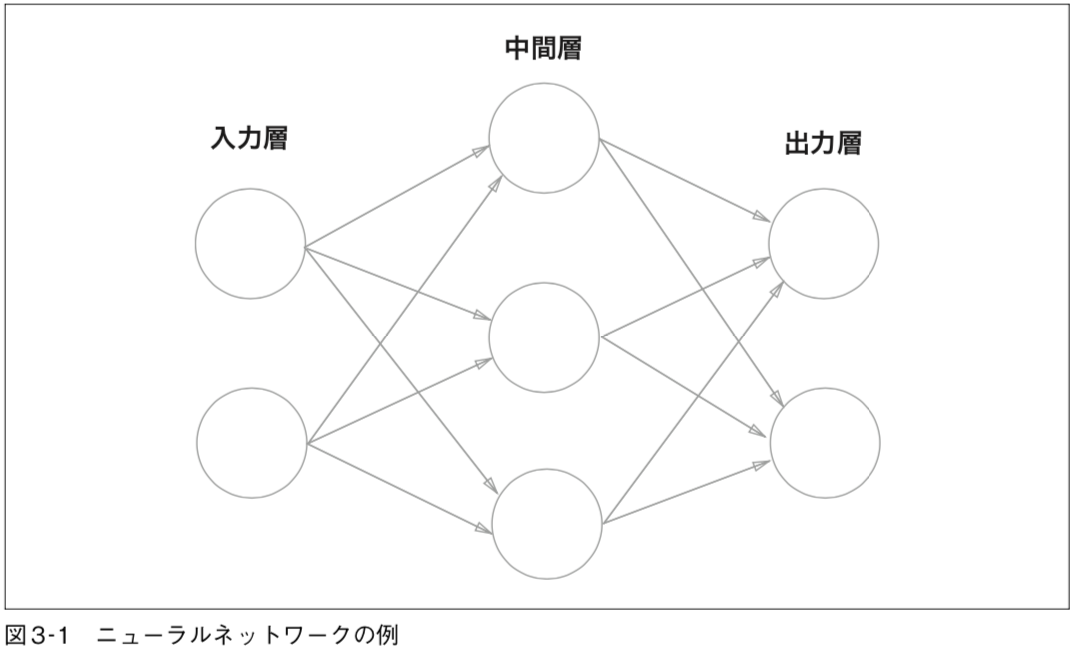

In [2]:
Image('images/fig3-1.png', width = 500)

1番左の列を入力層, 1番右の列を出力層, 中間の列を中間層と呼び, 中間層は隠れ層と呼ぶこともある. ここでは入力層から出力層へ向かって, 順に第0, 1, 2層と呼ぶことにし, 図3-1のようなネットワークを2層ネットワークと呼ぶことにする.

### 3.1.2 パーセプトロンの復習

図3-1で示したパーセプトロンにバイアス $b$ を明示すると, 図3-3のようになる.

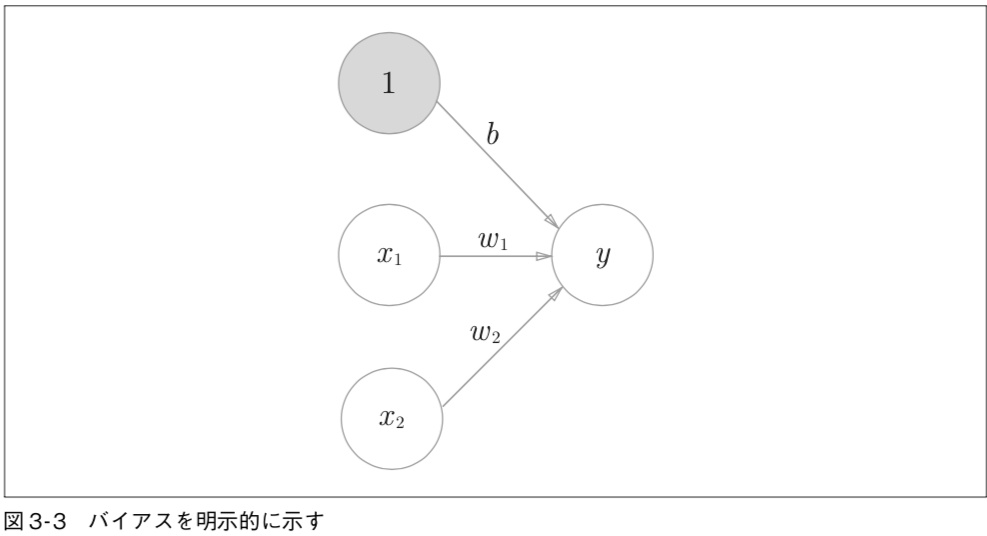

In [3]:
Image('images/fig3-3.png', width = 500)

これを数式で表すと,

$$
    y = h(b + w_1 x_1 + w_2 x_2)   \tag{3.1}
$$

$$
\begin{eqnarray}
h(x)=
    \left\{
        \begin{array}{l}
        0\ \     (x \le 0)\\
        1\ \     (x > 0)   \tag{3.2}
        \end{array}
    \right.
\end{eqnarray}
$$

これは, 入力信号の総和が $h(x)$ という関数によって変換され, その変換された値が出力 $y$ になるということを表している. $h(x)$ 関数は, 入力が 0 を超えたら 1 を, そうでなければ 0 を返す. 

### 3.1.3 活性化関数の登場

$h(x)$ のような入力信号の総和を出力信号に変換する関数は, 一般に活性化関数 (activation function) と呼ばれる.     
式(3.1)では, 重み付きの入力信号の総和を計算して, その和が活性化関数によって変換される, という2段階の処理をおこなっている. 

そのため, 式(3.1)を丁寧に書くとすれば, 次の2つの式に分けて書くことができる.

$$
     a = b + w_1 x_1 + w_2 x_2 \tag{3.3}
$$

$$
    y = h(a) \tag{3.4}
$$

式(3.3)では, 重み付き入力信号とバイアスの総和を計算し, それを$a$とする. 式(3.4)において, $a$ が $h()$ で変換され $y$ が出力される, という流れになる.    
これまではニューロンをひとつの○で図示してきたが, 式(3.3)と式(3.4)を明示的に示すとすると, 図3-4のように表せる.

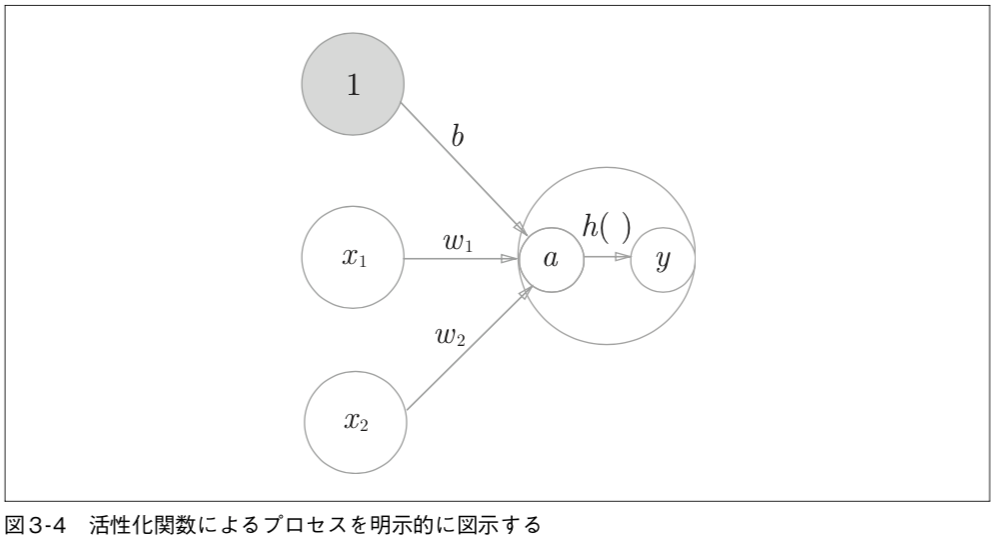

In [4]:
Image('images/fig3-4.png', width = 500)

図3-4で示されるように, これまでのニューロンの中の○に活性化関数にようプロセスを明示的に図示している.    
つまり重み付き信号の和の結果が $a$ というノードになり, 活性化関数 $h()$ によって $y$ というノードに変換される, ということがはっきりと示されている.

##  3.2 活性化関数

式(3.2)で表される活性化関数は, 閾値を境にして出力が切り替わる関数で, それはステップ関数と呼ばれる. そのため, ｢パーセプトロンでは, 活性化関数にステップ関数を利用している｣という表現をすることができる. つまり, 活性化関数の候補としてたくさんある関数の中で, パーセプトロンはステップ関数を採用している. 

パーセプトロンでは活性化関数にステップ関数を用いているが, ニューラルネットワークは活性化関数にステップ関数以外の関数を使った場合のものである. 

### 3.2.1 シグモイド関数

ニューラルネットワークでよく用いられる活性化関数のひとつは, 式(3.5)で表されるシグモイド関数である.

$$
    h(x) = \frac{1}{1+ exp(-x)} \tag{3.5}
$$

ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行い, その変換された信号が次のニューロンに伝えられる.   
パーセプトロンとニューラルネットワークの主な違いは, この活性化関数だけである.

### 3.2.2 ステップ関数の実装

ここでは, pythonを使ってステップ関数をグラフで表す.

In [5]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

この実装は単純で分かりやすいが, 引数の$x$は実数しか入力することができない. つまり, step_function(3.0)といった使い方はできるが, Numpyの配列を引数に取るような使い方ーstep_function(np.array([1.0, 2.0]))ーはできない.    

ここでは今後のことを考え, Numpy配列に対応した実装に修正する. そのため, 次のような実装を考える.

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

Numpy配列に対して不等号の演算を行うと, 配列の各要素に対して不等号の演算が行われ, ブーリアンの配列が生成される.   
ここでは, $x$という配列の要素に対し0より大きい要素はTrueに, 0以下の要素はFalseに変換され, 新しい配列yが生成される.   
先のyという配列はブーリアンの配列であるが, ほしい配列は0か1のint型であるので, 変換している.  
ここで示したように, Numpyの配列の型の変換にはastype()メソッドを使う.     
astype()メソッドでは, 引数に希望する型を指定する. pythonでは, boolean型からint型に変換すると, Trueが1に, Falseが0に変換される. 

### 3.2.3 ステップ関数のグラフ

上で定義した関数をグラフで表す.

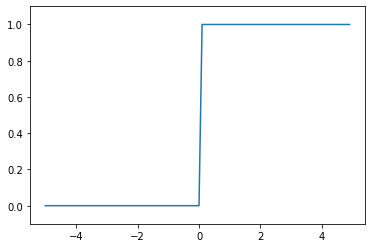

In [42]:
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定
plt.show()

### 3.2.4 シグモイド関数の実装

式(3.5)のシグモイド関数はpythonで次のように書くことができる.

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

このように, 引数$x$にNumpy配列を入力しても, 結果は正しく計算される.  
シグモイド関数をグラフに表すと次のようになる.

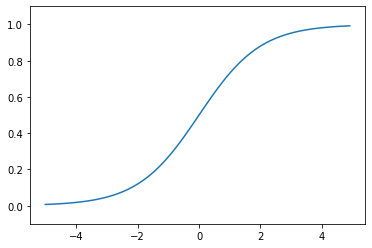

In [9]:
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 軸の範囲を指定
plt.show()

### 3.2.5 シグモイド関数とステップ関数の比較

ステップ関数が0か1のどちらかの値しか返さないのに対して, シグモイド関数は実数を返す. つまり, パーセプトロンでは,  ニューロン間を0か1の二値の信号が流れていたのに対して, ニューラルネットワークでは連続的な実数値の信号が流れる. ステップ関数とシグモイド関数の共通する性質は, 入力が小さいときに出力は0に近く, 入力が大きくなるにつれて出力が1に近づくという構造をしている. つまり, ステップ関数とシグモイド関数は, 入力信号が重要な情報であれば, 大きな値を出力し, 重要でなければ小さな値を出力する. また, どんなに入力信号の値が小さくても, 大きくても, 出力信号を0から1の間に押し込めるのも両者の共通点である.

### 3.2.6 非線形関数

ステップ関数とシグモイド関数の他の共通点として, 重要なものは, 両者は共に非線形関数であるということもある. ニューラルネットワークでは, 活性化関数に線形関数を用いると, 層を深くする意味がなくなってしまうため, 活性化関数に非線形関数を用いる必要がある. 線形関数の問題点は, どんなに層を深くしても, それと同じことを行う｢隠れ層のないネットワークが存在する｣という事実に起因する.

### 3.2.7 ReLU関数

最近は前述した関数よりもReLU(Rectified Linear Unit)という関数が主に用いられる. ReLUは入力が0を超えていれば. その入力そそのまま出力し, 0以下ならば, 0を出力する関数である(図3-9). ReLU関数を数式で表すと, 次式のように書くことができる.

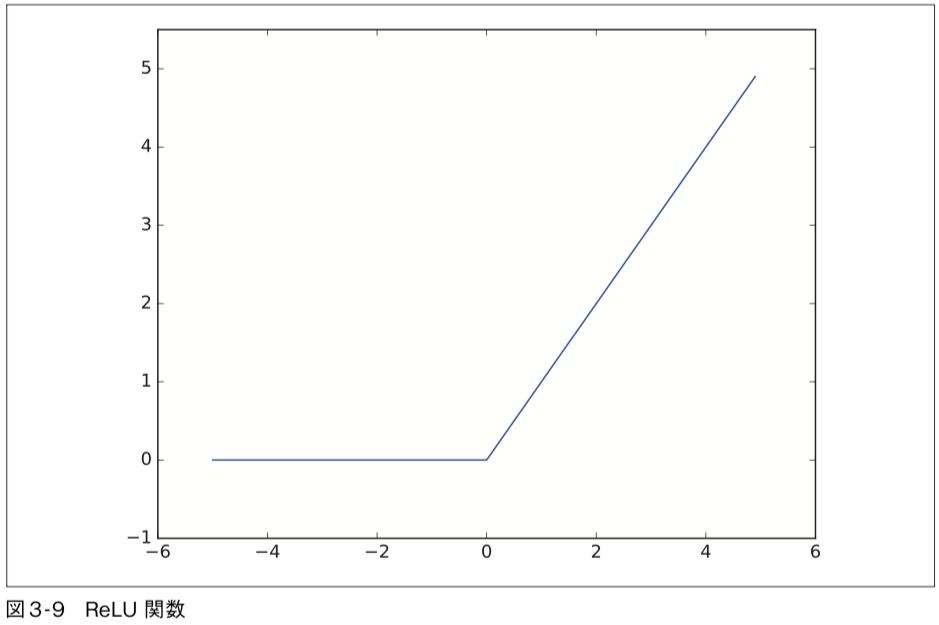

In [10]:
Image('images/fig3-9.png', width = 500)

$$
\begin{eqnarray}
h(x)=
    \left\{
        \begin{array}{l}
        0\ \     (x \le 0)\\
        x\ \     (x > 0)   \tag{3.6}
        \end{array}
    \right.
\end{eqnarray}
$$

グラフや数式の通り, ReLU関数は非常にシンプルな関数である. 実装も単純で,

In [11]:
def relu(x):
    return np.maximum(0, x)

ここでは, Numpyのmaximum関数を使っており, 入力された値から大きい方の値を選んで出力する関数である.

## 3.3 多次元配列の計算

### 3.3.1 多次元配列

多次元配列とは, 数字が1列に並んだものや長方形状に並べたもの, 3次元状に並べたものや, N次元状に並べたもののことである.

In [12]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


ここで示すように, 配列の次元数はnp.dim(), 形状はインスタンス変数のshapeから取得できる.

In [13]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [14]:
np.ndim(B)

2

In [15]:
B.shape

(3, 2)

ここでは3✕2の配列であるBを作成している. 

### 3.3.2 行列の内積

In [16]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

AとBの行列の積をnp.dot()で計算する. Numpy配列を2つ引数にとり, それらの内積を結果とて返す.

### 3.3.3 ニューラルネットワークの内積

Numpy行列を使ってニューラルネットワークの実装を行う. ここでは, 図3-14の簡単なニューラルネットワークを対象とする.

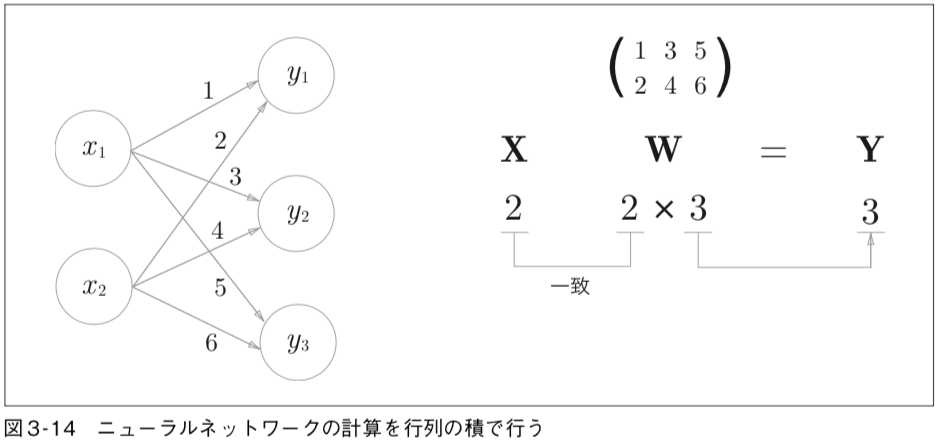

In [17]:
Image('images/fig3-14.png', width = 600)

このニューラルネットワークはバイアスと活性化関数は省略し, 重みだけがあるものとします.   
実装に関しては, X, W, Yの形状に注意し, 特にXとWの対応する次元の要素数が一致していることが重要な点である.

In [18]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

ここで示したように, np.dot(多次元配列のドット積)を使えば, Yの結果を一度に計算することができる.   
これは, もしYの要素が100や1000あったとしても, 一度の演算で計算できるということを意味する.

## 3.4 3層ニューラルネットワークの実装

ここでは図3-15に示す3層ニューラルネットワークを対象として, その入力から出力への処理(フォワード方向への処理)を実装する.

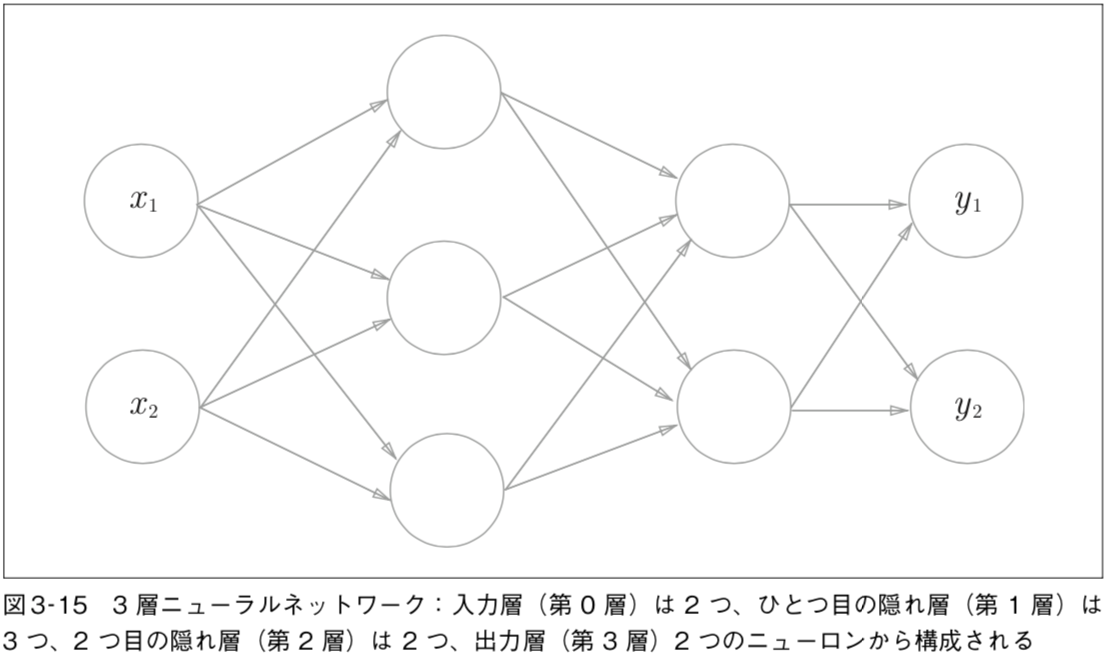

In [19]:
Image('images/fig3-15.png', width = 600)

### 3.4.1 記号の確認

ここでは, ニューラルネットワークで行う処理を説明するにあたって, $w_{12}^{(1)}$や$a_1^{(1)}$などの記号を導入する.

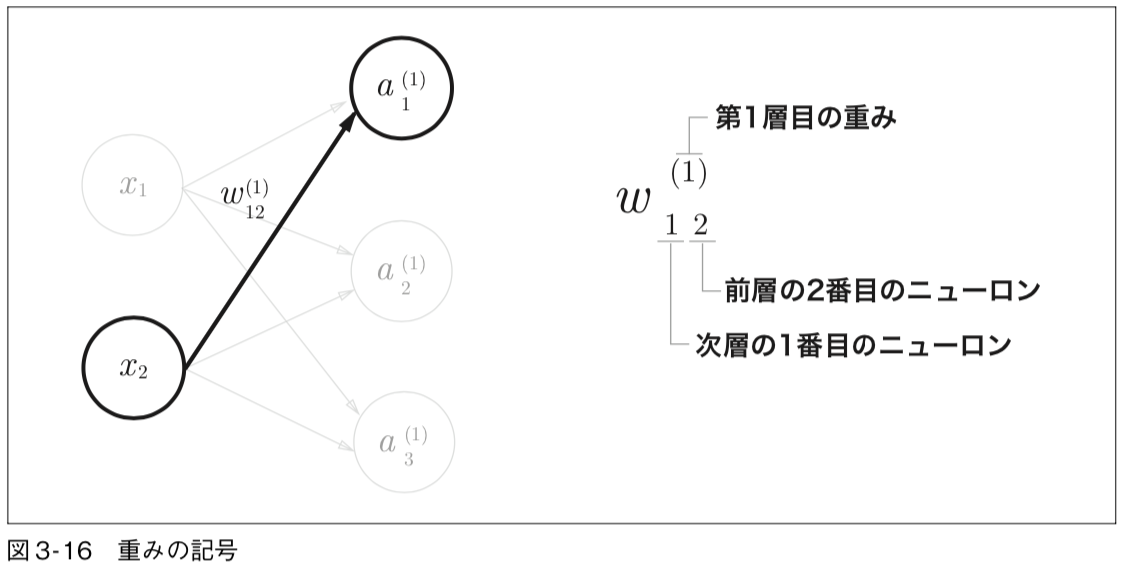

In [20]:
Image('images/fig3-16.png', width = 600)

図3-16に示す通り, 重みや隠れ層のニューロンの右上には｢(1)｣とあるが, これは, 第1層の重み, 第1層のニューロン, ということを意味している.  
また, 重みの右下の2つの数字は, これは, 次層のニューロンと前層のニューロンのインデックス番号から構成される.   
たとえば, $w_{12}^{(1)}$は前層の2番目のニューロンから次層の1番目のニューロンへの重みであることを意味する.

### 3.4.2 各層における信号伝達の実装

まず, 入力層から｢第1層目の1番目のニューロン｣への信号の伝達を考える. 図で表すと, 図3-17のようになる.

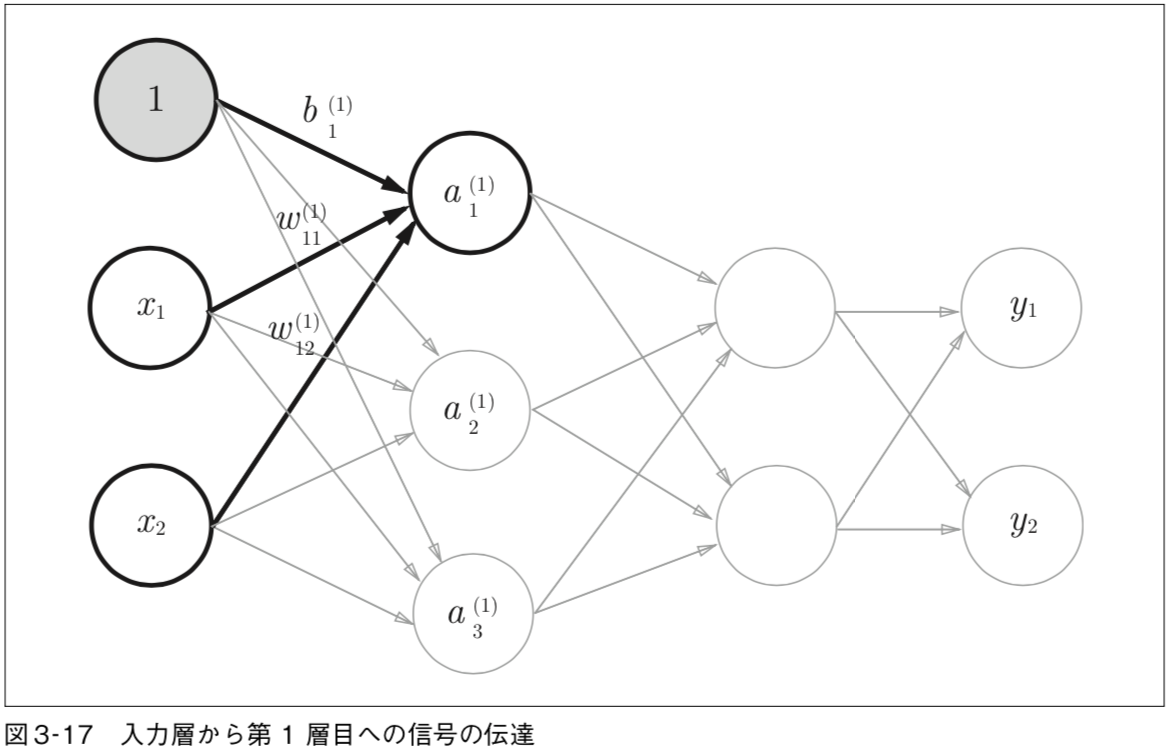

In [21]:
Image('images/fig3-17.png', width = 600)

図のように, バイアスのためのニューロンである①が追加されている.   
前層のバイアスニューロンはひとつしか存在しないため, バイアスの右下のインデックスがひとつしかないことに注意する.  
$a_1^{(1)}$を数式で表すと,

$$
    a_1^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)} \tag{3.7}
$$

また, 行列の内積を用いると, 第1層目の重み付き和は次式で表すことができる.

$$
    \mathbf{A^{(1)}} = \mathbf{X} \mathbf{W^{(1)}} + \mathbf{B^{(1)}} \tag{3.8}
$$

ただし, $\mathbf{A^{(1)}}, \mathbf{X}, \mathbf{B^{(1)}}, \mathbf{W^{(1)}}$は, 次の通りである.

$$
     \mathbf{A^{(1)}} =
         \left(\begin{array}
                aa_{1}^{(1)} & a_{2}^{(1)} & a_{3}^{(1)}
        \end{array}\right)
$$        

$$
     \mathbf{X} =
         \left(\begin{array}
                xx_{1} & x_{2}
        \end{array}\right)
$$        

$$
     \mathbf{B^{(1)}} =
         \left(\begin{array}
                bb_{1}^{(1)} & b_{2}^{(1)} & b_{3}^{(1)}
        \end{array}\right)
$$        

$$
    \mathbf{W^{(1)}} =
         \left(\begin{array}
            ww_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
            w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \\
        \end{array}\right)
$$

ここでは, 入力信号, 重み, バイアスを適当な値に設定して, Numpyの多次元配列を使って, 式(3.9)を実装する. 

In [22]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape)  # (2,)
print(B1.shape) # (3,)
A1 = np.dot(X, W1) + B1
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

続いて, 第1層目の活性化関数によるプロセスを考える. この活性化関数によるプロセスを図示すると, 下図3-18のようになる.

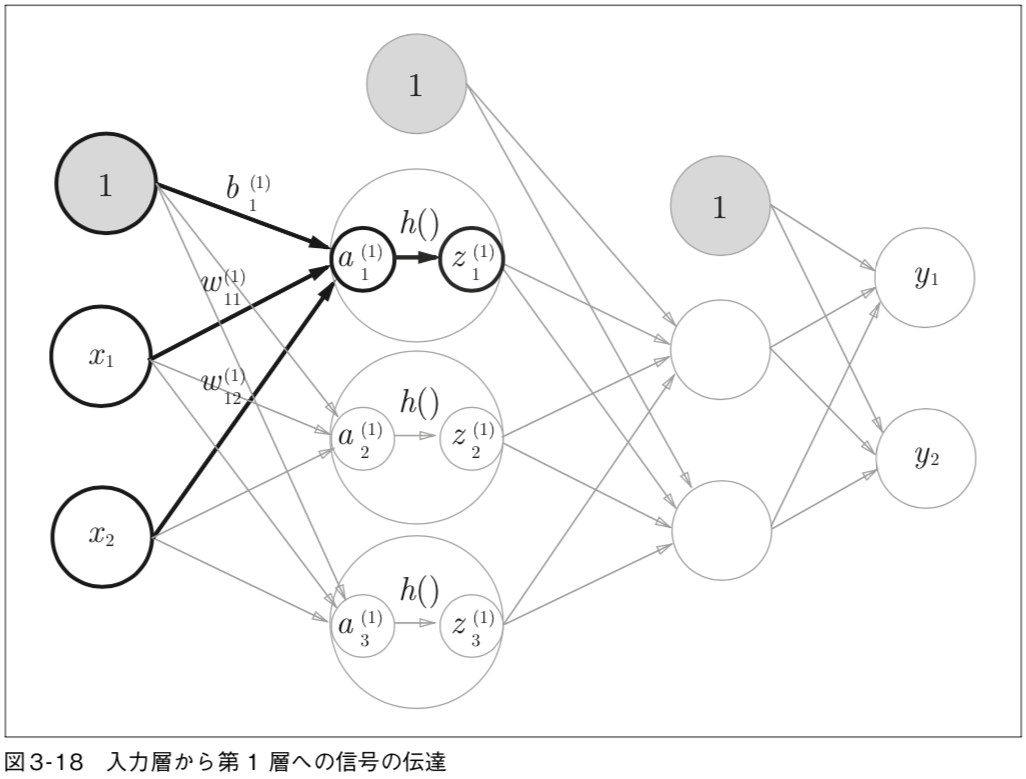

In [23]:
Image('images/fig3-18.png', width = 600)

隠れ層での重み付き和(重み付き信号とバイアスの総和)を$a$で表し, 活性化関数で変換された信号を$z$で表すことにする.   
また, 図では活性化関数を$h()$で表し, ここではシグモイド関数を使うことにする.  
これをpythonで実装すると次のようになる.

In [24]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

このsigmoid()関数は前に定義した関数で, Numpy配列を受け取り, 同じ要素数からなるNumpy配列を返す.  
続いて, 第1層から第2層までの実装を行う. (図3-19)

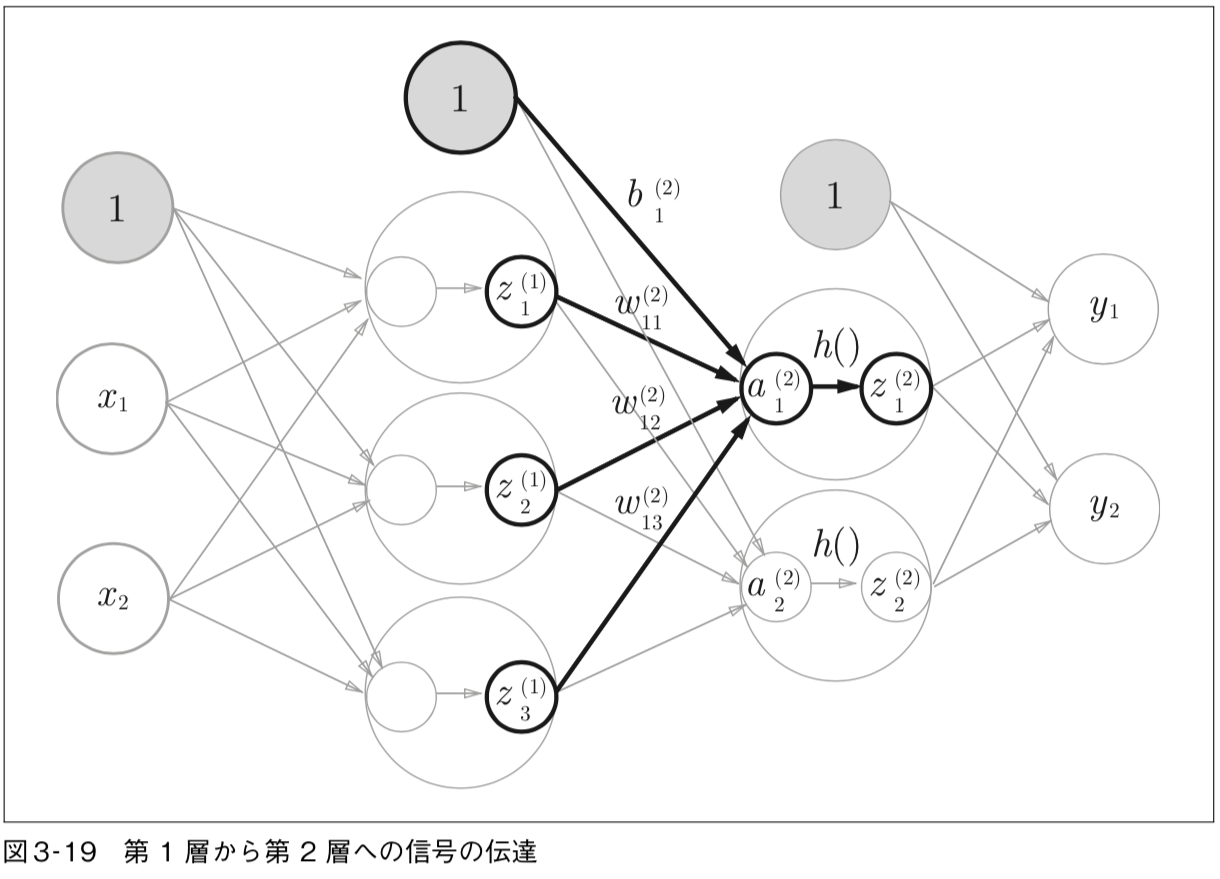

In [25]:
Image('images/fig3-19.png', width = 600)

In [26]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

この実装は, 第1層の出力(Z1)が第2層への入力になっている点を除けば, 先程の実装とまったく同じである.   
NumPy配列を使うことで, 層から層への信号の伝達が簡単にかけることがわかる.  
最後に, 第2層から出力層への信号の伝達を実装する. (図3-20)  
ほとんどこれまでと同じだが, 最後の活性化関数だけがこれまでの隠れ層とは異なる.

In [27]:
def identity_function(x):
        return x
    
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

ここでは, identity_function()という関数を定義して, この関数(恒等関数という)を出力層の活性化関数として利用する.  
恒等関数は, 入力をそのまま出力する関数であるため, ここでわざわざ定義する必要はないが, 流れを統一するために, このような実装としている.     
図3-20では出力層の活性化関数は$\sigma()$で表し, 隠れ層の活性化関数$h()$とは異なることを明示している.

### 3.4.3 実装のまとめ

ここまでの実装をまとめて記述する.   
ニューラルネットワーク実装の慣例として, 重みだけをW1といった大文字で記述し, それ以外は小文字で記述する.

In [28]:
def init_network():
        network = {}
        network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        network['b1'] = np.array([0.1, 0.2, 0.3])
        network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        network['b2'] = np.array([0.1, 0.2])
        network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        network['b3'] = np.array([0.1, 0.2])
        return network

def forward(network, x):
        W1, W2, W3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = identity_function(a3)
        return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


ここでは, init_network(), forward()という関数を定義している.   
init_network()関数で, 重みとバイアスの初期化を行い, それらをディクショナリ型の変数に格納する.   
この変数networkには, それぞれの層で必要なパラメータが核のされている.   
forward()関数では, 入力信号が出力へと変換されるプロセスがまとめて実装されている.

## 3.5 出力層の設計

ニューラルネットワークは, 分類問題と回帰問題の両方に用いることができるが, 分類問題と回帰問題のどちらに用いるかで, 出力層の活性化関数を変更する必要がある. 一般的に, 回帰問題では恒等関数を, 分類問題では, ソフトマックス関数を使う.

### 3.5.1 恒等関数とソフトマックス関数

恒等関数は, 入力をそのまま出力する関数である. そのため, 出力層で恒等関数を用いるときには, 入力信号をそのまま出力するだけになる.

一方, 分類問題で使われるソフトマックス関数は次式で表される.

$$
    y_k = \frac{\mathrm{exp}(a_k)}{\sum_{i=1}^{n}\mathrm{exp}(a_i)} \tag{3.9}
$$

ここでは, 出力層が全部で $n$ 個あるとして, $k$ 番目の出力 $y_k$ を求める計算式を表している.  
式(3.9)に示すように, ソフトマックス関数の分子は入力信号 $a_k$ の指数関数, 分母はすべての入力信号の指数関数の和から構成される.  
ソフトマックス関数を図で表すと, 次の図3-22のようになる. 出力は, すべての入力信号から影響を受けることになる.

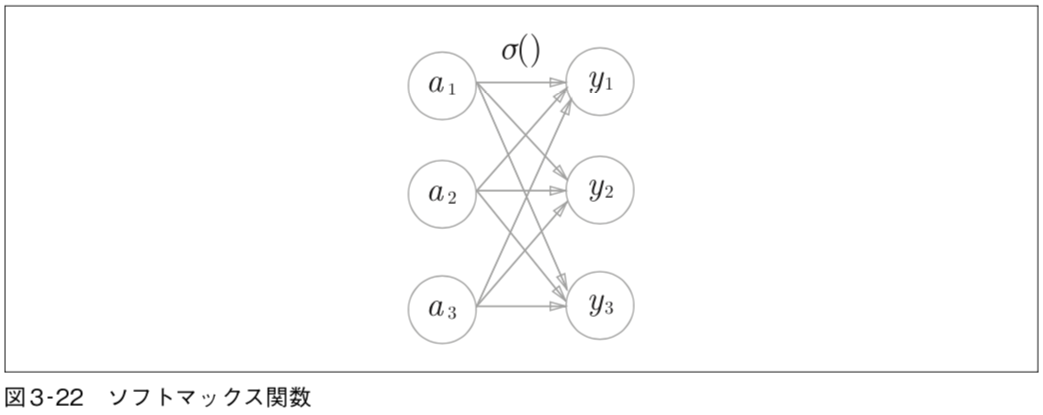

In [29]:
Image('images/fig3-22.png', width = 600)

ソフトマックス関数を実装する. 

In [30]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2 ソフトマックス関数の実装上の注意

上のsoftmax関数は, 式(3.9)を正しく表現できているが, コンピュータで計算を行う上ではオーバーフローに関する問題がある. 指数関数の計算を行うことになるが, その際, 指数関数の値が容易に大きな値になる. たとえば, $e^{10}$は20,000を超え, $e^{100}$は0が40個以上も並ぶ大きな値になり, $e^{1000}$の結果は無限大を表すinfが返ってくる.

ソフトマックス関数の実装の改善案は, 次式(3.10)から導かれる.

$$
    y_k = \frac{\mathrm{exp}(a_k)}{\sum_{i=1}^{n}\mathrm{exp}(a_i)}\\
    = \frac{C\mathrm{exp}(a_k)}{C\sum_{i=1}^{n}\mathrm{exp}(a_i)}\\
    = \frac{\mathrm{exp}(a_k + \log C)}{\sum_{i=1}^{n}\mathrm{exp}(a_i + \log C)}\\
    = \frac{\mathrm{exp}(a_k + C')}{\sum_{i=1}^{n}\mathrm{exp}(a_i + C')} \tag{3.10}
$$

式(3.11)で述べていることは, ソフトマックスの指数関数の計算を行う際には, 何らかの定数を足し算しても結果は変わらないということである.   
ここで$C'$にはどのような値を用いることもできるが, オーバーフローの対策としては, 入力信号の中で最大の値を用いることが一般的である.

In [31]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [32]:
c = np.max(a)
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

上記の例のように, 普通に計算していたらnanであったところを, 入力信号の最大値(上の例ではc)を引くことで, 正しく計算できるようになった. このことを踏まえて, ソフトマックス関数の実装をすると次のようになる.

In [33]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.3 ソフトマックス関数の特徴

softmax関数を使えば, ニューラルネットワークの出力は次のように計算することができる.

In [34]:
a = np.array([0.3, 2.0, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.0213123  0.11666243 0.86202526]
1.0


ここで示したように, ソフトマックス関数の出力は, 0から1.0の実数になる. また出力の総和は1になる. これは重要な性質であり, これのおかげで, ソフトマックス関数の出力を確率として解釈することができる.

注意点としては, ソフトマックス関数を適用しても各要素の大小関係は変わらないということであり, 指数関数が単調増加する関数であることに起因する.   
ニューラルネットワークのクラス分類では, 一般的に, 出力の1番大きいニューロンに相当するクラスだけを認識結果とするため, 分類を行う際には, 出力層のソフトマックス関数を省略することができる.

### 3.5.4 出力層のニューロンの数

出力層のニューロンの数は, 解くべき問題に応じて, 適宜定める必要がある.  
クラス分類を行う問題では, 出力層のニューロンの数は分類したいクラスの数に設定するのが一般的である.

## 3.6 手書き数字認識

学習はすでに完了したものとして, 学習済みパラメータを使って, ニューラルネットワークの推論処理だけを行ってみる.   
この推論処理はニューラルネットワークの順方向伝搬(forward propagation)とも言う.

### 3.6.1 MNISTデータセット

ここでは, MNISTという手書き数字の画像データセットを使用する. MNISTデータセットは, 0から9までの数字画像から構成される(図3-24). 訓練画像が60,000枚, テスト画像が10,000枚用意されており, それらの画像を使用して, 学習と推論を行う, 一般的なMNISTデータセットの使い方では, 訓練画像を使って学習を行い, 学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測する.

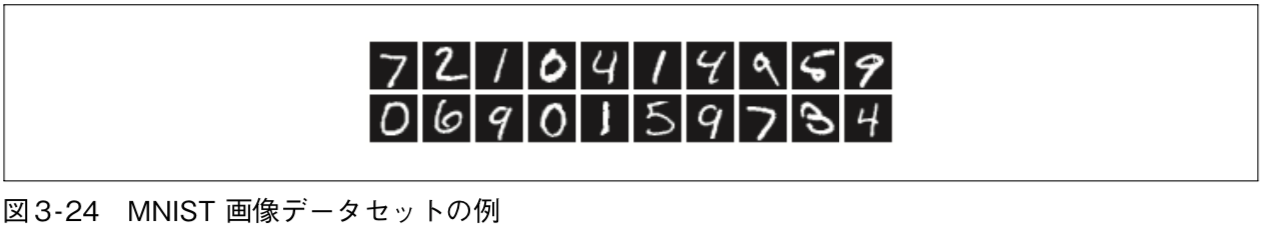

In [35]:
Image('images/fig3-24.png', width = 600)

ここでは, 本書で用意されている, MNISTデータセットのダウンロードから画像データの NumPy配列への変換までをサポートする便利な Pythonスクリプトであるmnist.pyを使用する.

### 3.6.2 ニューラルネットワークの推論処理

MNISTデータセットに対して, 推論処理を行うニューラルネットワークを実装する.  
ネットワークは, 入力層を784(28✕28)個, 出力層を10(0~9)個のニューロンで構成する.  
また, 隠れ層が2つあり, 1つ目の隠れ層が50個, 2つ目の層が100個のニューロンをもつものとする. この50と100は任意の値に設定できる.   

まずはじめに, 以下の3つの関数を定義する.

In [36]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

init_network()では, pickleファイルのsample_weight.pklに保存された学習済みの重みパラメータを読み込む.

これらの関数を使って, ニューラルネットワークによる推論処理を行い, 認識精度の評価を行う.

In [37]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


これは93.52%正しく分類することができた, ということを表している.  

この例ではload_mnist関数の引数であるnormalizeにはTrueを設定し, 各ピクセルの画素値を255で除算し, 0~1.0の範囲に収まるように正規化を行った.  
このように, ニューラルネットワークの入力データに対して, 何らかの変換を行うことを,前処理(pre-processing)という.

### 3.6.3 バッチ処理

ここでは, 入力データと重みパラメータの形状に注意して, これまでの実装を再考する.

In [38]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


上記の結果から, 対応する配列の次元数が一致していることがわかる. 図で表すとすれば, 図3-26のようになる.

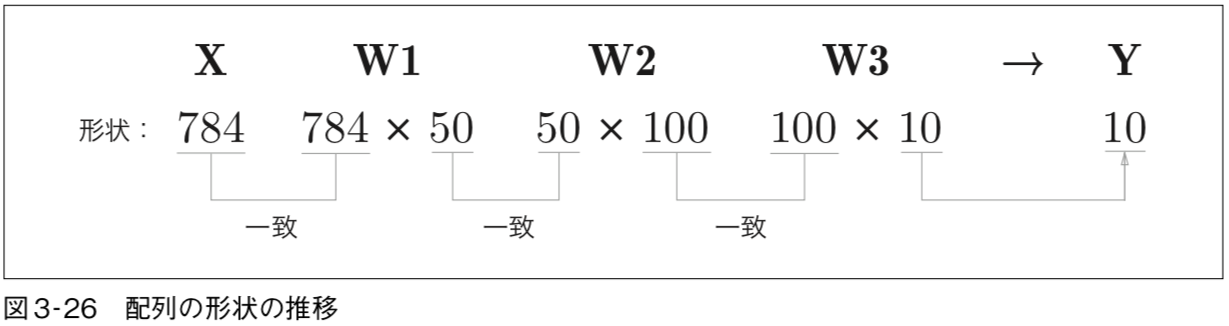

In [39]:
Image('images/fig3-26.png', width = 600)

図3-26は, 全体を通してみれば, 784の要素からなる1次元配列が入力され, 10次元の配列が出力されるという流れになっている. 

上記の例は, 画像データを1枚だけ入力したときの処理の流れであるが, 次に, 画像を複数枚まとめて入力する場合を考える.   100枚の画像をまとめて, 1回のpredict()関数で処理するためには,  xの形状を100 ✕ 784として, 100枚分のデータを入力データとすることができる.
図で表すとすると, 図3-27のようになる.

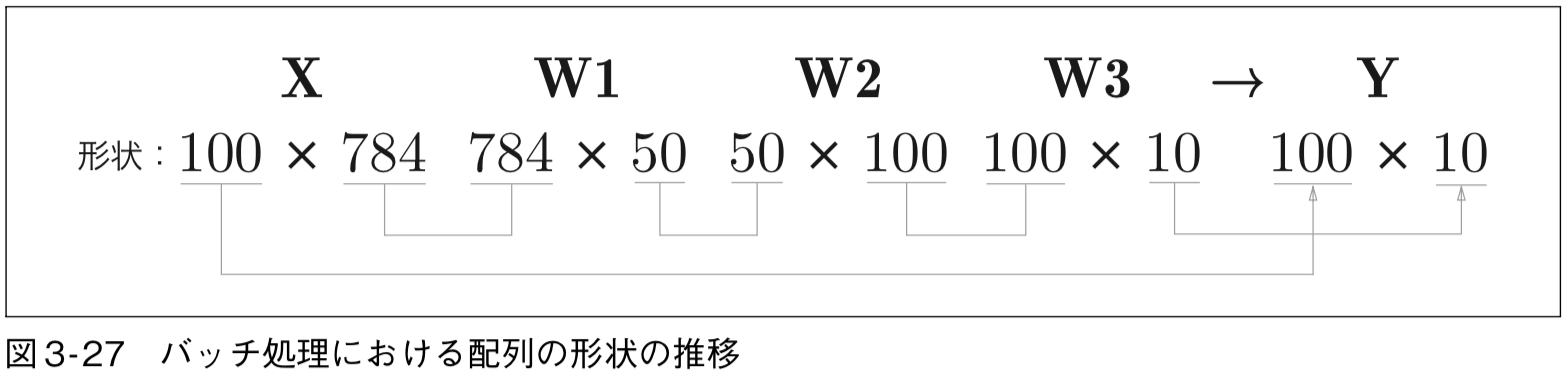

In [40]:
Image('images/fig3-27.png', width = 600)

図3-27のように, 入力データの形状は, 100 ✕ 784, 出力データの形状は 100 ✕ 10 となる. これは, 100枚分の入力データの結果が一度に出力されることを表している.   

このような, まとまりのある入力データをバッチ (batch) と呼ぶ. 続いて, バッチ処理による実装を行う.

In [41]:
x, t = get_data()
network = init_network()

batch_size = 100 #変更点
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


range() 関数によって出力されるリストを元に, x[i:i+batch_size] のように, 入力データの先頭から 100 枚ずつバッチを抜き出し, argmax() で最大値のインデックスを取得する. ここで, axis = 1 という引数は, 100 ✕ 10 の配列の中で, 1次元目の要素ごとに, 最大値のインデックスを見つけることを指定している.  
最後に, バッチ単位で分類した結果と, 実際の答えを比較するために, NumPy配列どうしで, 比較演算子によって, True/False からなる boolean 配列を作成し, True の個数を算出する. 

## 3.7 まとめ

本章では, ニューラルネットワークの順方向の伝搬について扱った. 本章のニューラルネットワークは前章のパーセプトロンと, ニューロンの信号が階層的に伝わるという点で同じであった. しかし, 次のニューロンへ信号を送信する際に, 信号を変化させる活性化関数に大きな違いがあった. ニューラルネットワークでは, 活性化関数がなめらかに変化する(連続な実数をとる)シグモイド関数, パーセプトロンでは信号が急に変化する(0と1しか取らない)ステップ関数を使用した. この違いがニューラルネットワークの学習において重要になる.